#1) fraud data
#Use decision trees to prepare a model on fraud data
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,BaseDecisionTree


In [2]:
from google.colab import files
uploaded=files.upload()


Saving Fraud_check.csv to Fraud_check.csv


In [3]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
data.corr

<bound method DataFrame.corr of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [7]:
data['Work.Experience'].value_counts()    #unbalanced

10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Work.Experience, dtype: int64

In [8]:
data.shape

(600, 6)

In [9]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [10]:
data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


In [11]:
data['Taxable.Income']=data['Taxable.Income'].map(lambda x:1 if x>30000 else 0) #np.where is used to make big values to binary forms
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [12]:
data['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

<Axes: >

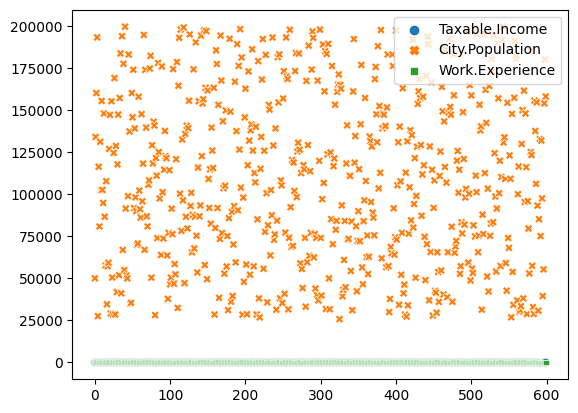

In [13]:
sns.scatterplot(data)

<Axes: xlabel='Taxable.Income', ylabel='count'>

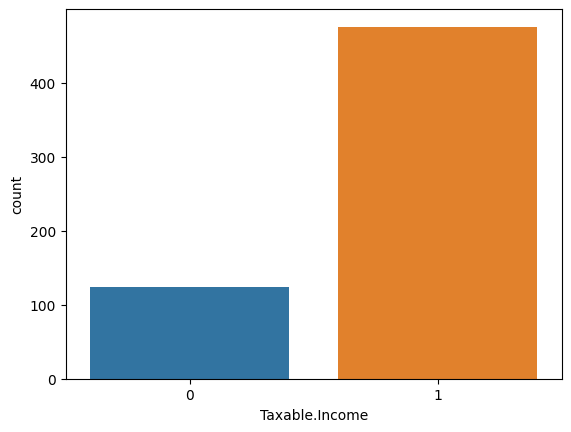

In [14]:
sns.countplot(x=data['Taxable.Income'])

In [15]:
data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'])
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1,50047,10,1,0,0,0,1,0,1
1,1,134075,18,0,1,1,0,0,0,1
2,1,160205,30,1,0,0,1,0,0,1
3,1,193264,15,0,1,0,0,1,0,1
4,1,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,1,0,0,0,1
596,1,55369,2,0,1,1,0,0,0,1
597,1,154058,0,1,0,1,0,0,0,1
598,1,180083,17,0,1,0,1,0,1,0


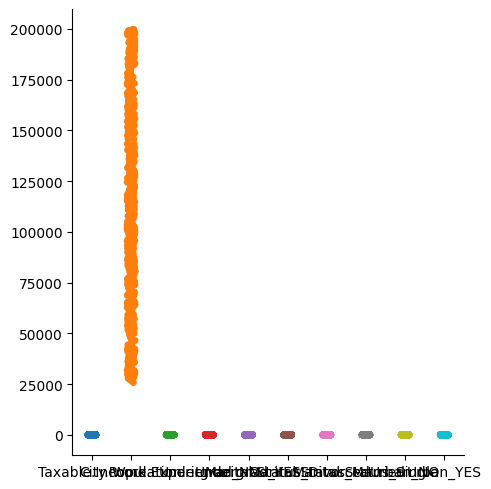

In [16]:
sns.catplot(data)

<ipython-input-17-946844e4f3c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Taxable.Income'])


<Axes: xlabel='Taxable.Income', ylabel='Density'>

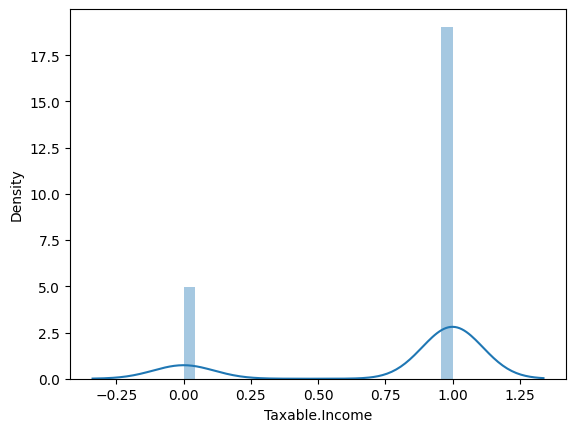

In [17]:
sns.distplot(data['Taxable.Income'])

In [18]:
data.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

<Axes: >

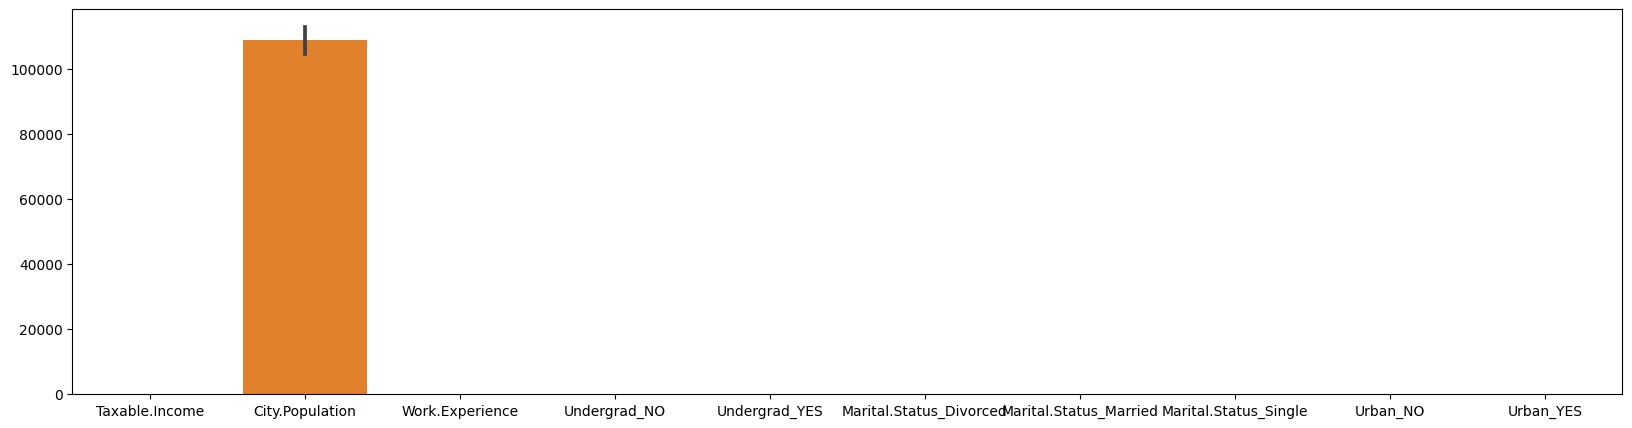

In [19]:
plt.figure(figsize=[20,5])
sns.barplot(data)


In [20]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [21]:
x,y

(     City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  \
 0              50047               10             1              0   
 1             134075               18             0              1   
 2             160205               30             1              0   
 3             193264               15             0              1   
 4              27533               28             1              0   
 ..               ...              ...           ...            ...   
 595            39492                7             0              1   
 596            55369                2             0              1   
 597           154058                0             1              0   
 598           180083               17             0              1   
 599           158137               16             1              0   
 
      Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  \
 0                          0                       0             

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [23]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.375, 0.875, 'x[1] <= 0.5\nentropy = 0.73\nsamples = 480\nvalue = [98, 382]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5, 0.625, 'x[1] <= 22.5\nentropy = 0.737\nsamples = 472\nvalue = [98, 374]'),
 Text(0.25, 0.375, 'x[1] <= 17.5\nentropy = 0.772\nsamples = 340\nvalue = [77, 263]'),
 Text(0.125, 0.125, 'entropy = 0.72\nsamples = 271\nvalue = [54, 217]'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 69\nvalue = [23, 46]'),
 Text(0.75, 0.375, 'x[0] <= 65500.0\nentropy = 0.632\nsamples = 132\nvalue = [21, 111]'),
 Text(0.625, 0.125, 'entropy = 0.316\nsamples = 35\nvalue = [2, 33]'),
 Text(0.875, 0.125, 'entropy = 0.714\nsamples = 97\nvalue = [19, 78]')]

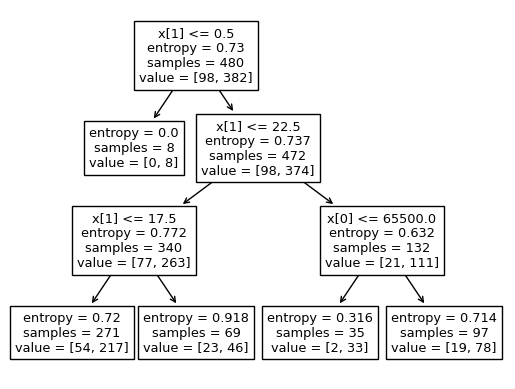

In [24]:
tree.plot_tree(model)

In [25]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
y_pred_df=pd.DataFrame({'ACTUAL':y_test,'PREDICT':y_pred})

In [27]:
y_pred_df

,ACTUAL,PREDICT
338,0,1
589,1,1
354,0,1
15,1,1
48,0,1
...,...,...
599,1,1
83,1,1
225,1,1
348,1,1


In [28]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
accuarcy=accuracy_score(y_test,y_pred)
accuarcy

0.7833333333333333

#normalization


In [30]:
def norm_func(i):     #making deciml
  x=(i-i.min())/(i.max()-i.min())
  return x

In [31]:
dataa=norm_func(data)
dataa

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1.0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
595,1.0,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,1.0,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,1.0,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,1.0,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [32]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [34]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.375, 0.875, 'x[1] <= 0.5\nentropy = 0.73\nsamples = 480\nvalue = [98, 382]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\nentropy = 0.739\nsamples = 469\nvalue = [98, 371]'),
 Text(0.25, 0.375, 'x[0] <= 28428.0\nentropy = 0.793\nsamples = 247\nvalue = [59, 188]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.125, 'entropy = 0.788\nsamples = 246\nvalue = [58, 188]'),
 Text(0.75, 0.375, 'x[0] <= 197443.0\nentropy = 0.671\nsamples = 222\nvalue = [39, 183]'),
 Text(0.625, 0.125, 'entropy = 0.646\nsamples = 218\nvalue = [36, 182]'),
 Text(0.875, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]')]

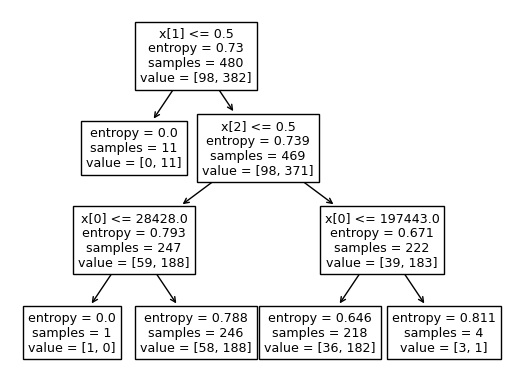

In [35]:
tree.plot_tree(model)

In [36]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
y_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
y_pred_df

,actual,predicted
300,1,1
101,1,1
390,1,1
477,1,1
532,1,1
...,...,...
154,0,1
68,0,1
166,1,1
85,0,1


In [38]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.04      0.07        26
           1       0.79      0.99      0.88        94

    accuracy                           0.78       120
   macro avg       0.64      0.51      0.47       120
weighted avg       0.73      0.78      0.70       120



In [39]:
accuary=accuracy_score(y_test,y_pred)
accuary

0.7833333333333333

#2)company data
#A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
#Approach - A decision tree can be built with target variable Sale & all other variable will be independent in the analysis.  


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,BaseDecisionTree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
data=pd.read_csv('Company_Data.csv')
data

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.corr

In [ ]:
data.describe()

In [ ]:
data.columns

In [ ]:
data['Sales']=data['Sales'].map(lambda x:1 if x>5 else 0)

In [ ]:
data=pd.get_dummies(data,columns=['ShelveLoc','Urban','US'])
data

In [ ]:
data['Sales'].value_counts()

In [ ]:
sns.heatmap(data)

In [ ]:
data.columns

In [ ]:
sns.distplot(data['Sales'])

In [ ]:
sns.scatterplot(data)

In [ ]:
sns.pairplot(data)

In [ ]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

In [ ]:
tree.plot_tree(model)

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
y_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
y_pred_df

In [ ]:
report=classification_report(y_test,y_pred)
print(report)

In [ ]:
accuaracy=accuracy_score(y_test,y_pred)
accuaracy

#gridsearchcv



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid=GridSearchCV(estimator=model,param_grid={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]})

In [ ]:
grid

In [ ]:
grid.fit(x,y)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

#THE END
